<a href="https://colab.research.google.com/github/josephyaconelli/VAEs-in-Economics/blob/master/Notebooks/Demographic_Data_ATUS_2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 

# data
df = pd.read_csv('https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Data/Timeuse/atussum_2013/atussum_2013.dat',index_col=0)


In [0]:
#GTMETSTA (Metropolitan Status)

metropolitan = df['GTMETSTA'] == 1
metropolitan = metropolitan.astype("float32")
metropolitan.name = "Metropolitan"
print(np.mean(metropolitan))


0.8279314637184143


In [0]:

#PEEDUCA
peeduca = df['PEEDUCA']

peeducaMap = {
  31: 'Less than 1st grade',
  32: '1st, 2nd, 3rd, or 4th grade',
  33: '5th or 6th grade',
  34: '7th or 8th grade',
  35: '9th grade',
  36: '10th grade',
  37: '11th grade',
  38: '12th grade - no diploma',
  39: 'High school graduate - diploma or equivalent (GED)',
  40: 'Some college but no degree',
  41: 'Associate degree - occupational/vocational',
  42: 'Associate degree - academic program',
  43: 'Bachelors degree (BA, AB, BS, etc.)',
  44: 'Masters degree (MA, MS, MEng, MEd, MSW, etc.)',
  45: 'Professional school degree (MD, DDS, DVM, etc.)',
  46: 'Doctoral degree (PhD, EdD, etc.)'
}

mappedPEEDUCA = peeduca.map(peeducaMap)
education = pd.get_dummies(mappedPEEDUCA)
print(np.mean(education))

10th grade                                            0.027668
11th grade                                            0.032675
12th grade - no diploma                               0.014581
1st, 2nd, 3rd, or 4th grade                           0.005446
5th or 6th grade                                      0.012033
7th or 8th grade                                      0.022310
9th grade                                             0.026263
Associate degree - academic program                   0.056302
Associate degree - occupational/vocational            0.041282
Bachelors degree (BA, AB, BS, etc.)                   0.207378
Doctoral degree (PhD, EdD, etc.)                      0.019236
High school graduate - diploma or equivalent (GED)    0.257268
Less than 1st grade                                   0.001669
Masters degree (MA, MS, MEng, MEd, MSW, etc.)         0.094335
Professional school degree (MD, DDS, DVM, etc.)       0.014317
Some college but no degree                            0

In [0]:
# PEHSPNON

hispanic = df['PEHSPNON'] == 1
hispanic = hispanic.astype("float32")
hispanic.name = "Hispanic"
print(np.mean(hispanic))

0.14378568530082703


In [0]:
# PTDTRACE

raceDf = df['PTDTRACE']
raceMap = {
    1: 'White only',
    2: 'Black only',
    3: 'American Indian, Alaskan Native only',
    4: 'Asian only',
    5: 'Hawaiian/Pacific Islander only',
    6: 'White-Black',
    7: 'White-American Indian',
    8: 'White-Asian',
    9: 'White-Hawaiian',
    10: 'Black-American Indian',
    11: 'Black-Asian',
    12: 'Black-Hawaiian',
    13: 'American Indian-Asian',
    14: 'Multi-Race',
    15: 'Multi-Race',
    16: 'Multi-Race',
    17: 'Multi-Race',
    18: 'Multi-Race',
    19: 'Multi-Race',
    20: 'Multi-Race',
    21: 'Multi-Race',
    22: 'Multi-Race',
    23: 'Multi-Race',
    24: 'Multi-Race',
    25: 'Multi-Race',
    26: 'Multi-Race',
}

mappedRace = raceDf.map(raceMap)
race = pd.get_dummies(mappedRace)
print(np.mean(race))
print(race.columns)

American Indian, Alaskan Native only    0.008783
Asian only                              0.037330
Black only                              0.150637
Black-American Indian                   0.000966
Black-Asian                             0.000351
Black-Hawaiian                          0.000088
Hawaiian/Pacific Islander only          0.001845
Multi-Race                              0.000878
White only                              0.788494
White-American Indian                   0.006500
White-Asian                             0.001318
White-Black                             0.002459
White-Hawaiian                          0.000351
dtype: float64
Index(['American Indian, Alaskan Native only', 'Asian only', 'Black only',
       'Black-American Indian', 'Black-Asian', 'Black-Hawaiian',
       'Hawaiian/Pacific Islander only', 'Multi-Race', 'White only',
       'White-American Indian', 'White-Asian', 'White-Black',
       'White-Hawaiian'],
      dtype='object')


                     Age
tucaseid                
20130101130004  0.073574
20130101130112  0.341341
20130101130123  0.487988
20130101130611  0.540541
20130101130616  0.454955
...                  ...
20131212132458  1.000000
20131212132462  0.719219
20131212132469  0.417417
20131212132475  0.505506
20131212132488  0.360360

[11385 rows x 1 columns]


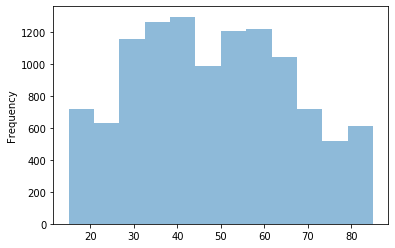

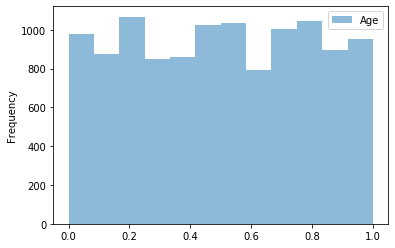

In [0]:
# Age
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

ageDf = df['TEAGE']
ageDf.plot.hist(bins=12, alpha=0.5) 
ageDf = ageDf.values.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
age = pd.DataFrame(qt_trans.fit_transform(ageDf), index = df.index)
age.columns = ['Age']
age.plot.hist(bins=12, alpha=0.5)

print(age)


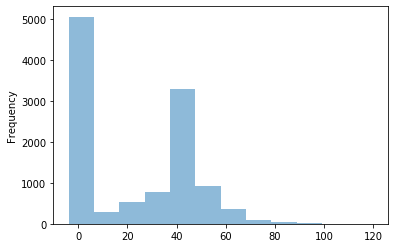

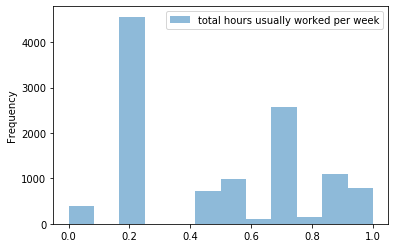

In [0]:
# Hours Worked

hoursWorkedDf = df['TEHRUSLT']
hoursWorkedDf.plot.hist(bins=12, alpha=0.5)
hoursWorkedDf = hoursWorkedDf.values.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
hoursWorked = pd.DataFrame(qt_trans.fit_transform(hoursWorkedDf), index = df.index)
hoursWorked.columns = ['total hours usually worked per week']
hoursWorked.plot.hist(bins=12, alpha=0.5)

In [0]:
# Employement Status

employementStatusDf = df['TELFS']
employmentStatusMap = {
  1: 'Employed - at work',
  2: 'Employed - absent',
  3: 'Unemployed - on layoff',
  4: 'Unemployed - looking',
  5: 'Not in labor force',
}
mappedES = employementStatusDf.map(employmentStatusMap)
employementStatus = pd.get_dummies(mappedES)
print(np.mean(employementStatus))

Employed - absent         0.025911
Employed - at work        0.573474
Not in labor force        0.348265
Unemployed - looking      0.048134
Unemployed - on layoff    0.004216
dtype: float64


In [0]:
# Work more than one job
mtoJob = df['TEMJOT'] == 1
mtoJob = mtoJob.astype("float32")
mtoJob.name = "in the last seven days did you have more than one job? - yes"
print(np.mean(mtoJob))


0.05243741720914841


In [0]:
# Enrolled in high school, college, or university
enrolledInSchool = df['TESCHENR'] == 1
enrolledInSchool = enrolledInSchool.astype("float32")
enrolledInSchool.name = "Are you enrolled in high school, college, or university? - Yes"
print(np.mean(enrolledInSchool))

0.08739569783210754


In [0]:

whatSchoolDf = df['TESCHLVL']
whatSchoolMap = {
  1: 'High school',
  2: 'College or university',
}
mappedWhatSchool = whatSchoolDf.map(whatSchoolMap)
whatSchool = pd.get_dummies(mappedWhatSchool)
print(np.mean(whatSchool))


College or university    0.050944
High school              0.036451
dtype: float64


In [0]:
# Sex
sexDf = df['TESEX'] == 2
sex = sexDf.astype("float32")
sex.name = "Sex, Female"
print(np.mean(sex))





0.5536231994628906


In [0]:
# Emplyment of spouse
employmentOfSpouseDF = df['TESPEMPNOT'] == 1
employementOfSpouse = employmentOfSpouseDF.astype("float32")
employementOfSpouse.name = "Employement of spouse, employed"
print(np.mean(employementOfSpouse))


0.34325867891311646


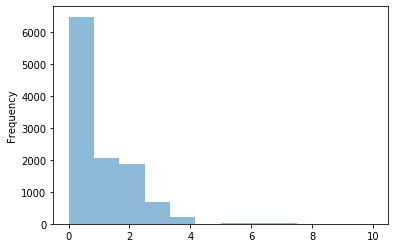

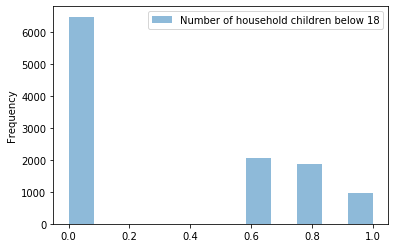

In [0]:
#Number of household children below 18

numOfHHChildren = df['TRCHILDNUM']
numOfHHChildren.plot.hist(bins=12, alpha=0.5)
numOfHHChildren = numOfHHChildren.values.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=2)
numOfHHChildren = pd.DataFrame(qt_trans.fit_transform(numOfHHChildren), index = df.index)
numOfHHChildren.columns = ['Number of household children below 18']
numOfHHChildren.plot.hist(bins=12, alpha=0.5)

In [0]:
#Full time or part time employment status of respondent

FulltimeParttime = df['TRDPFTPT']
FulltimeParttimeMap = {
  1: 'Full time',
  2: 'Part time',
}
MappedFulltimeParttime = FulltimeParttime.map(FulltimeParttimeMap)
FulltimeParttime = pd.get_dummies(MappedFulltimeParttime)
print(np.mean(FulltimeParttime))

Full time    0.469829
Part time    0.129556
dtype: float64


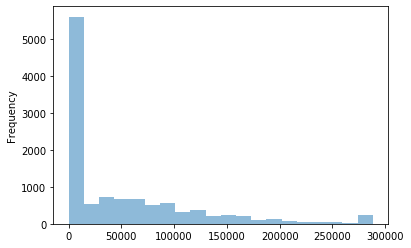

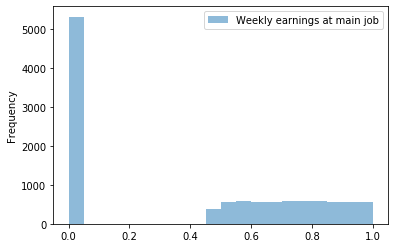

In [0]:
# Weekly earnings at main job (2 implied decimals)

weeklyEarnings = df['TRERNWA']
weeklyEarnings.plot.hist(bins=20, alpha=0.5)
weeklyEarnings = weeklyEarnings.values.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
weeklyEarnings = pd.DataFrame(qt_trans.fit_transform(weeklyEarnings), index = df.index)
weeklyEarnings.columns = ['Weekly earnings at main job']
weeklyEarnings.plot.hist(bins=20, alpha=0.5)


In [0]:
#TRHOLIDAY

# Holiday
Holiday = df['TRHOLIDAY'] == 1
Holiday = Holiday.astype("float32")
Holiday.name = "Holiday"
print(np.mean(Holiday))

0.019499341025948524


In [0]:
#Full time or part time employment status of spouse

FulltimeParttimeSpouse = df['TRSPFTPT']
FulltimeParttimeSpouseMap = {
  1: 'Full time - spouse',
  2: 'Part time - spouse',
}
MappedFulltimeParttimeSpouse = FulltimeParttimeSpouse.map(FulltimeParttimeSpouseMap)
FulltimeParttimeSpouse = pd.get_dummies(MappedFulltimeParttimeSpouse)
print(np.mean(FulltimeParttimeSpouse))

Full time - spouse    0.275889
Part time - spouse    0.053228
dtype: float64


In [0]:
#Presence of the respondent's spouse or unmarried partner in the household

spousePresent = df['TRSPFTPT']
spousePresentMap = {
  1: 'Spouse present',
  2: 'Unmarried partner present',
  3: 'No spouse or unmarried partner present'
}
MappedSpousePresent = spousePresent.map(spousePresentMap)
spousePresent = pd.get_dummies(MappedSpousePresent)
print(np.mean(spousePresent))

No spouse or unmarried partner present    0.014141
Spouse present                            0.275889
Unmarried partner present                 0.053228
dtype: float64


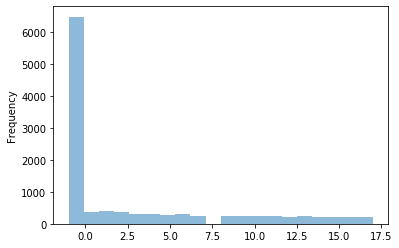

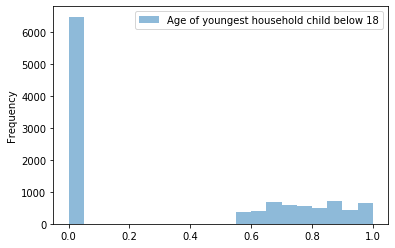

In [0]:
# Age of youngest household child < 18

ageOfYoungest = df['TRYHHCHILD']
ageOfYoungest.plot.hist(bins=20, alpha=0.5)
ageOfYoungest = ageOfYoungest.values.reshape(-1, 1)
qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
ageOfYoungest = pd.DataFrame(qt_trans.fit_transform(ageOfYoungest), index = df.index)
ageOfYoungest.columns = ['Age of youngest household child below 18']
ageOfYoungest.plot.hist(bins=20, alpha=0.5)

In [0]:
#TUDIARYDAY

diaryDay = df['TUDIARYDAY']
diaryDayMap = {
  1: 'Sunday',
  2: 'Monday',
  3: 'Tuesday',
  4: 'Wednesday',
  5: 'Thursday',
  6: 'Friday', 
  7: 'Saturday'
}
MappedDiaryDay = diaryDay.map(diaryDayMap)
diaryDay = pd.get_dummies(MappedDiaryDay)
print(np.mean(diaryDay))

Friday       0.100747
Monday       0.101186
Saturday     0.237945
Sunday       0.261221
Thursday     0.096531
Tuesday      0.096794
Wednesday    0.105578
dtype: float64


In [0]:
data=weeklyEarnings
data=data.join([sex,age,numOfHHChildren,employementStatus,hoursWorked,education,race,hispanic,metropolitan])
data=data.dropna()
qt=data


In [0]:
from sklearn.model_selection import train_test_split 
x_train, x_test = train_test_split(qt, test_size=0.33, random_state=42)
train_examples = x_train.shape[0]
flag_0 = np.zeros((train_examples,1),dtype=x_train.values.dtype)
x_train = np.concatenate((x_train.values,flag_0),axis=-1)
test_examples = x_test.shape[0]
flag_1 = np.ones((test_examples,1),dtype=x_test.values.dtype)
x_test = np.concatenate((x_test.values,flag_1),axis=-1)

In [0]:
!rm -f vaes_net.py
!wget "https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py"


--2020-03-08 00:58:26--  https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10405 (10K) [text/plain]
Saving to: ‘vaes_net.py’

vaes_net.py         100%[===================>]  10.16K  --.-KB/s    in 0s      

2020-03-08 00:58:27 (157 MB/s) - ‘vaes_net.py’ saved [10405/10405]



In [0]:
qt.shape

(11385, 41)

In [0]:
import vaes_net as vnn
import importlib

In [0]:
epochs = 500
batch_size = 256   

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
(?, 1)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 42)]         0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None, 41)]         0           input_1[0][0]                    
__________________________________________________________________________________________________
gaussian_noise (GaussianNoise)  (None, 41)           0           tf_op_layer_strided_slice_1[0][0]
__________________________________________________________________________________________________
dense (Dense)                   (None, 2048)         88064       gaussian_noise[0][0]             
____

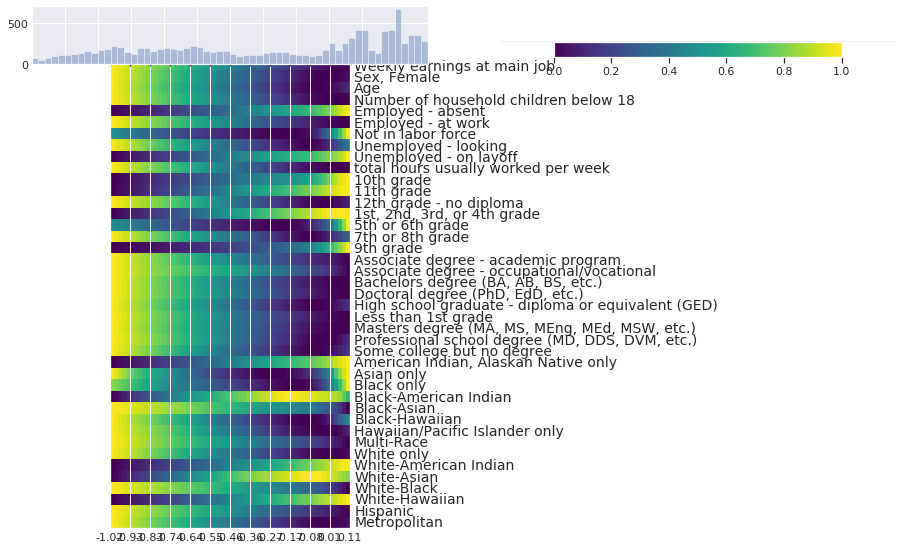

7627/7627 [==============================] - 5s 699us/sample - loss: 0.0814 - val_loss: 0.0628
Epoch 2/167
7627/7627 [==============================] - 1s 66us/sample - loss: 0.0549 - val_loss: 0.0499
Epoch 3/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0507 - val_loss: 0.0462
Epoch 4/167
7627/7627 [==============================] - 1s 66us/sample - loss: 0.0476 - val_loss: 0.0439
Epoch 5/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0457 - val_loss: 0.0413
Epoch 6/167
7627/7627 [==============================] - 1s 66us/sample - loss: 0.0442 - val_loss: 0.0406
Epoch 7/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0428 - val_loss: 0.0385
Epoch 8/167
7627/7627 [==============================] - 1s 66us/sample - loss: 0.0416 - val_loss: 0.0378
Epoch 9/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0410 - val_loss: 0.0381
Epoch 10/167
7627/7627 [==============================] -

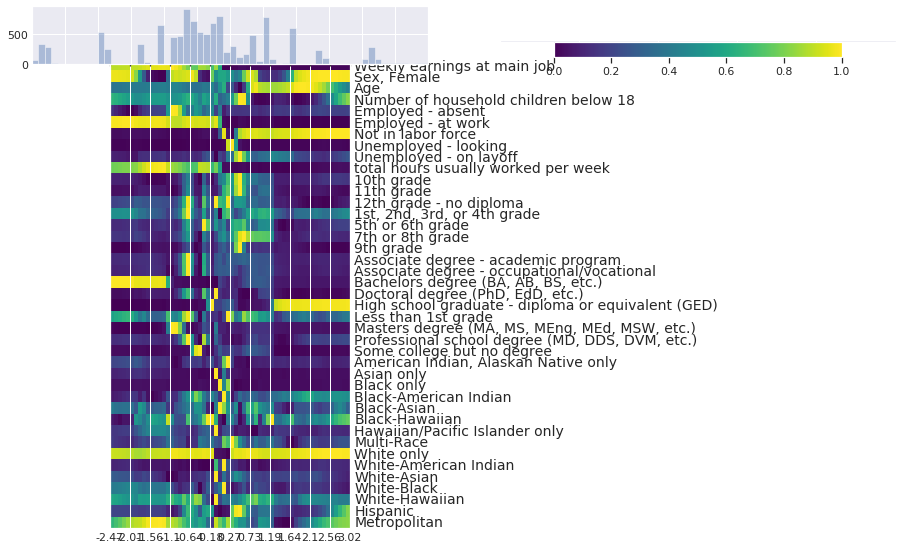

7627/7627 [==============================] - 2s 284us/sample - loss: 0.0316 - val_loss: 0.0276
Epoch 102/167
7627/7627 [==============================] - 1s 68us/sample - loss: 0.0320 - val_loss: 0.0274
Epoch 103/167
7627/7627 [==============================] - 1s 66us/sample - loss: 0.0314 - val_loss: 0.0273
Epoch 104/167
7627/7627 [==============================] - 0s 64us/sample - loss: 0.0314 - val_loss: 0.0272
Epoch 105/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0317 - val_loss: 0.0274
Epoch 106/167
7627/7627 [==============================] - 1s 66us/sample - loss: 0.0314 - val_loss: 0.0272
Epoch 107/167
7627/7627 [==============================] - 1s 66us/sample - loss: 0.0313 - val_loss: 0.0272
Epoch 108/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0314 - val_loss: 0.0279
Epoch 109/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0319 - val_loss: 0.0277
Epoch 110/167
7627/7627 [================

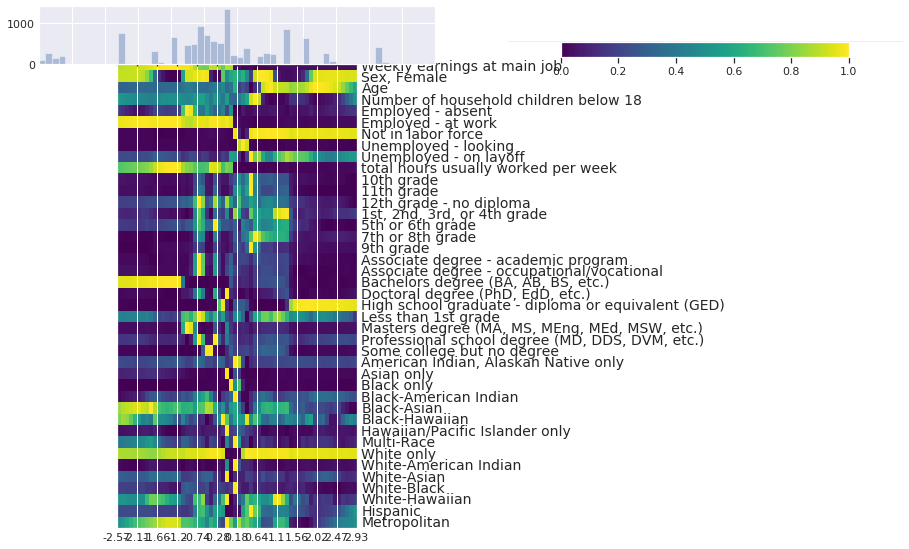

7627/7627 [==============================] - 2s 281us/sample - loss: 0.0310 - val_loss: 0.0270
Epoch 2/167
7627/7627 [==============================] - 1s 66us/sample - loss: 0.0308 - val_loss: 0.0270
Epoch 3/167
7627/7627 [==============================] - 1s 66us/sample - loss: 0.0308 - val_loss: 0.0270
Epoch 4/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0328 - val_loss: 0.0310
Epoch 5/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0335 - val_loss: 0.0281
Epoch 6/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0321 - val_loss: 0.0272
Epoch 7/167
7627/7627 [==============================] - 0s 64us/sample - loss: 0.0317 - val_loss: 0.0270
Epoch 8/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0313 - val_loss: 0.0270
Epoch 9/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0310 - val_loss: 0.0270
Epoch 10/167
7627/7627 [==============================] -

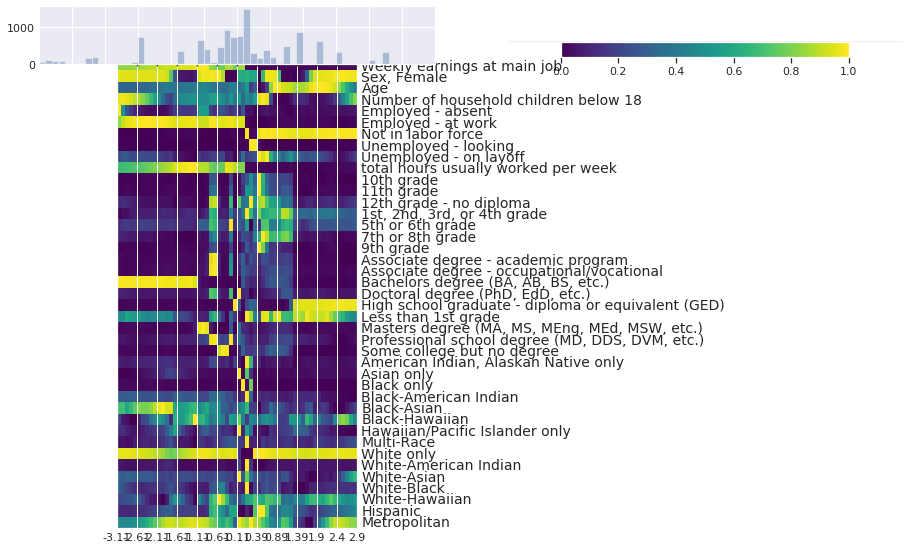

7627/7627 [==============================] - 2s 298us/sample - loss: 0.0305 - val_loss: 0.0270
Epoch 102/167
7627/7627 [==============================] - 1s 68us/sample - loss: 0.0304 - val_loss: 0.0267
Epoch 103/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0302 - val_loss: 0.0267
Epoch 104/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0303 - val_loss: 0.0267
Epoch 105/167
7627/7627 [==============================] - 0s 66us/sample - loss: 0.0302 - val_loss: 0.0267
Epoch 106/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0305 - val_loss: 0.0268
Epoch 107/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0306 - val_loss: 0.0272
Epoch 108/167
7424/7627 [============================>.] - ETA: 0s - loss: 0.0305
Epoch 00108: ReduceLROnPlateau reducing learning rate to 0.0006561000715009868.
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0305 - val_loss: 0.0268
E

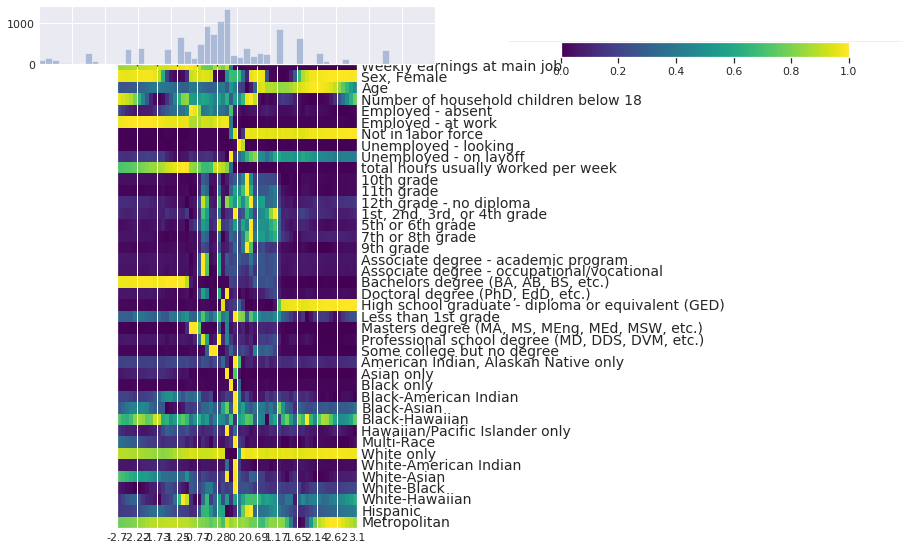

7627/7627 [==============================] - 2s 278us/sample - loss: 0.0299 - val_loss: 0.0261
Epoch 2/167
7627/7627 [==============================] - 1s 66us/sample - loss: 0.0300 - val_loss: 0.0261
Epoch 3/167
7627/7627 [==============================] - 0s 64us/sample - loss: 0.0299 - val_loss: 0.0262
Epoch 4/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0299 - val_loss: 0.0262
Epoch 5/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0297 - val_loss: 0.0261
Epoch 6/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0298 - val_loss: 0.0262
Epoch 7/167
7627/7627 [==============================] - 0s 64us/sample - loss: 0.0298 - val_loss: 0.0261
Epoch 8/167
7627/7627 [==============================] - 0s 64us/sample - loss: 0.0301 - val_loss: 0.0261
Epoch 9/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0299 - val_loss: 0.0261
Epoch 10/167
7627/7627 [==============================] -

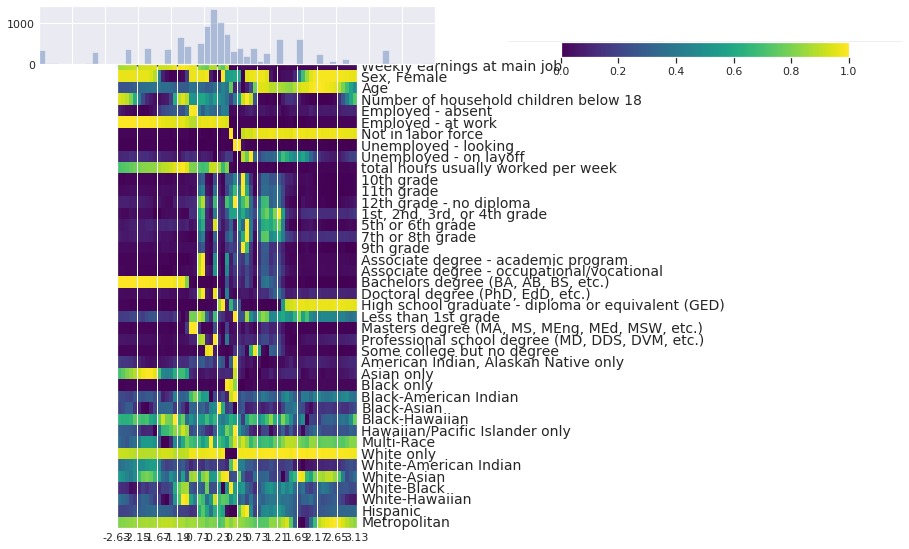

7627/7627 [==============================] - 2s 286us/sample - loss: 0.0290 - val_loss: 0.0250
Epoch 102/167
7627/7627 [==============================] - 1s 68us/sample - loss: 0.0291 - val_loss: 0.0248
Epoch 103/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0289 - val_loss: 0.0250
Epoch 104/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0290 - val_loss: 0.0250
Epoch 105/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0291 - val_loss: 0.0252
Epoch 106/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0292 - val_loss: 0.0250
Epoch 107/167
7627/7627 [==============================] - 0s 66us/sample - loss: 0.0291 - val_loss: 0.0250
Epoch 108/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0291 - val_loss: 0.0249
Epoch 109/167
7627/7627 [==============================] - 0s 65us/sample - loss: 0.0288 - val_loss: 0.0246
Epoch 110/167
7627/7627 [================

In [0]:
from tensorflow import set_random_seed
from numpy.random import seed

importlib.reload(vnn)
seed(42)
set_random_seed(42)
vae = vnn.make_vae(full_data=qt,  
    img_shape = (41+1, ),
    latent_dim = 1, 
    dense_width = 2048,
    l2_penalty=0.000000000001,
    l1_penalty=0.0,
    encoder_dropout_rate=0.5,
    decoder_dropout_rate=0.001,
    entanglement_penalty = 2,
    hidden_n = 3,
    plot_types_args = {'n_type': 60, 'each_hight' : 20, 
                                  'approx_width': 400, 
                                  'frac_width': 0.55, 
                                 'n_activity':  qt.shape[1],  
                                  'lowest_percentile': 1, 
                                  'highest_percentile' : 99, 
                                  'figsize': (10, 10),
                                  'cmap': 'viridis', 
                                  'n_xlabels':13, 
                                  'spacing': -0.005, 
                                  'hist_size': 0.08, 
                                  'scaler': True})  

vae.summary()

n_starts = 3

for i in range(0,n_starts):

  print("Round number: ", i+1)

  fitted = vae.fit(
      x=x_train, 
      y=None,
      shuffle=True,
      epochs=round(epochs/n_starts),
      batch_size=batch_size,
      validation_data=(x_test, None),
      callbacks = vae.callback_list
      )

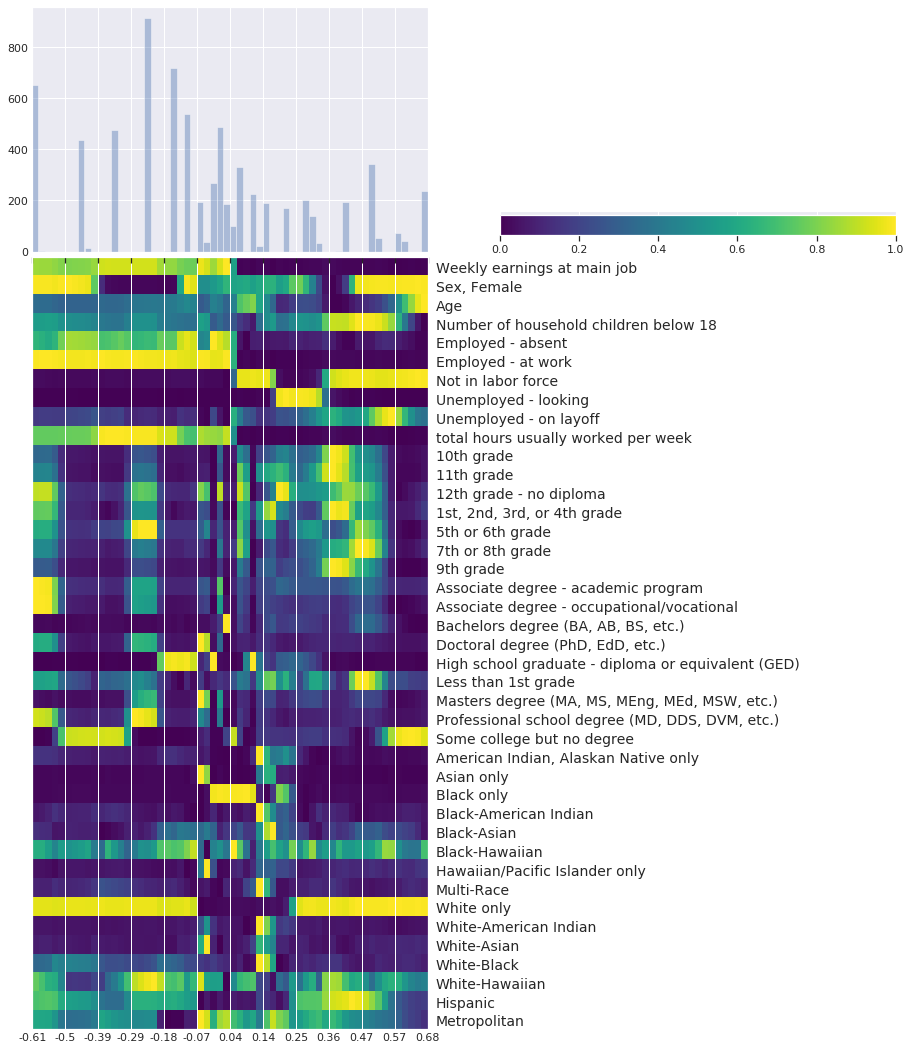

In [0]:
vnn.plot_types(encoder=vae.encoder,decoder=vae.decoder,data=qt,
           n_activity=  qt.shape[1],  
           lowest_percentile=20, 
           highest_percentile=80, 
           figsize =(10, 17), 
           hist_size=0.2);

In [0]:
flag_1 = np.ones((qt.shape[0], 1), dtype=qt.values.dtype)
data = np.concatenate((qt.values, flag_1), axis=-1)
encoded_demographics_nameless = pd.DataFrame(vae.encoder.predict(data))
encoded_demographics = encoded_demographics.rename(columns = {0: "dems"})
encoded_timeuse = pd.read_csv('https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Resources/encoded_data.csv', header=None)



In [0]:
print(encoded_demographics)
print(encoded_timeuse)

           dems
0      0.151914
1     -1.070678
2      0.289237
3     -0.443571
4      0.036154
...         ...
11380  0.837735
11381 -0.154592
11382 -0.154123
11383 -0.154363
11384  0.409904

[11385 rows x 1 columns]
              0
0     -0.016602
1     -0.918035
2     -0.996360
3      0.810461
4     -0.084622
...         ...
11380 -0.075259
11381  0.809656
11382  0.810051
11383 -0.005823
11384 -0.215460

[11385 rows x 1 columns]


In [0]:
print(encoded_demographics.columns.values)
selected_group = encoded_demographics.loc[(encoded_demographics["dems"] >= 0.471) & (encoded_demographics["dems"] <= 0.569)]
print(selected_group)

['dems']
           dems
84     0.501877
86     0.505848
126    0.508461
129    0.509409
136    0.498257
...         ...
11260  0.509740
11277  0.505820
11288  0.510541
11338  0.506070
11357  0.500596

[394 rows x 1 columns]


In [0]:
selected_timeuse = encoded_timeuse.iloc[selected_group.index.to_list()]
print(selected_timeuse)

              0
84    -0.300975
86    -0.221886
126    0.312184
129    0.311391
136    0.015251
...         ...
11260 -0.228994
11277  0.079463
11288 -0.037347
11338 -0.221549
11357 -0.182080

[394 rows x 1 columns]


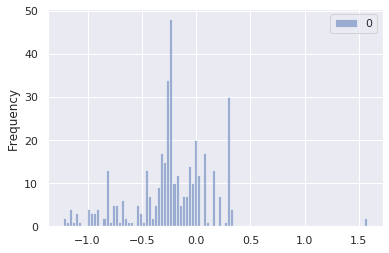

In [0]:
selected_timeuse.plot.hist(bins=100, alpha=0.5)

In [0]:

selected_demographics2 = encoded_demographics.loc[(encoded_demographics["dems"] >= -.291) & (encoded_demographics["dems"] <= -.179)]
selected_timeuse2 = encoded_timeuse.iloc[selected_demographics2.index.to_list()]


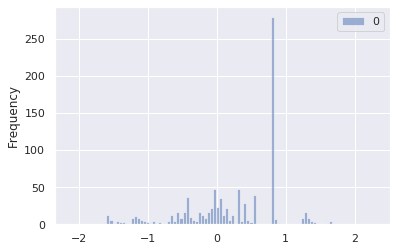

In [0]:

selected_timeuse2.plot.hist(bins=100, alpha=0.5)

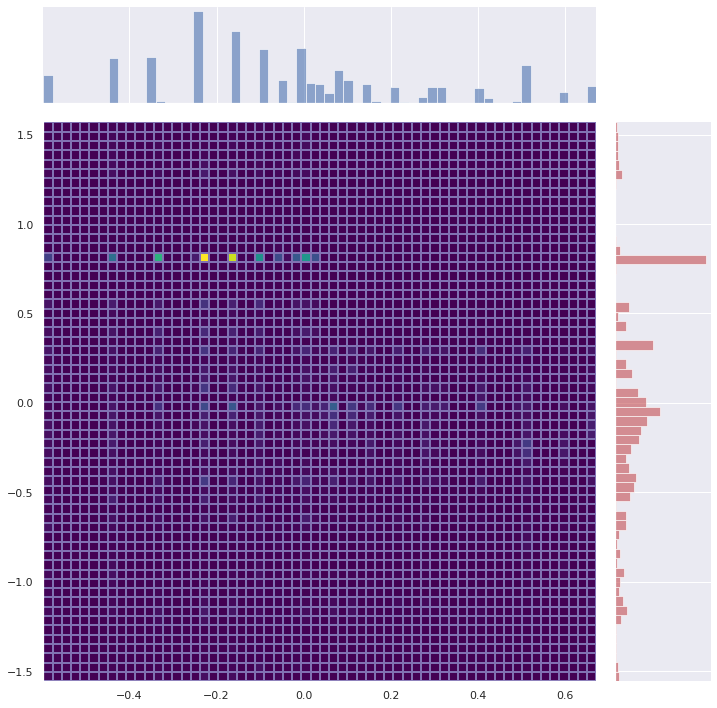

In [0]:
import seaborn as sns
lowest_dem_percentile = 20
highest_dem_percentile = 80
lowest_time_percentile = 1
highest_time_percentile = 99

lowest_dem = np.percentile(encoded_demographics, lowest_dem_percentile)
highest_dem = np.percentile(encoded_demographics, highest_dem_percentile)
lowest_time = np.percentile(encoded_timeuse, lowest_time_percentile)
highest_time = np.percentile(encoded_timeuse, highest_time_percentile)

demographics_bins = pd.cut(encoded_demographics["dems"], bins=60).value_counts()
timeuse_bins = pd.cut(encoded_timeuse[0], bins=60).value_counts()

g = sns.JointGrid(x=encoded_demographics, y=encoded_timeuse, height=10)
g = g.plot_joint(plt.hist2d, color="m", cmap='viridis', bins=[60, 60], range=[[lowest_dem, highest_dem], [lowest_time, highest_time]])
_ = g.ax_marg_x.hist(encoded_demographics.values, color="b", alpha=.6,
                     bins=np.linspace(lowest_dem, highest_dem, 60),
                     range=(lowest_dem, highest_dem)
                     )
_ = g.ax_marg_y.hist(encoded_timeuse.values, color="r", alpha=.6,
                     bins=np.linspace(lowest_time, highest_time, 60),
                     orientation="horizontal",
                     range=(lowest_time, highest_time)
                     )